<h1>Chapter 10. Introduction to Artificial Neural Networks</h1>

**Artificial neural networks (ANNs)** are computational models inspired by the structure and function of the human brain. They consist of interconnected nodes, called neurons, organized into layers. Information flows through the network from the input layer, where data is fed into the network, through one or more hidden layers, where complex transformations occur, to the output layer, where the network produces its predictions or classifications. ANNs are capable of learning complex patterns and relationships in data through a process called training, where the network adjusts its internal parameters (weights and biases) based on the input data and associated target labels. They are widely used in various applications such as image recognition, natural language processing, and time series forecasting.

<h2>From Biological Neurons to Artificial Neurons</h2>

While biological neurons communicate through electrochemical signals along interconnected pathways, artificial neurons in neural networks simulate this behavior through mathematical operations and adjustable parameters. By mimicking the way biological neurons process and transmit information, artificial neural networks enable machines to learn from data, recognize patterns, and make predictions in a manner analogous to human cognition.

<h3>Perceptron</h3>

**Perceptron** is a fundamental building block of ANN. It's a type of **Linear Threshold Unit (LTU)** that takes multiple binary inputs and produces a single binary output. The perceptron calculates a weighted sum of its inputs and applies a threshold function to determine the output. If the weighted sum exceeds the threshold, the perceptron outputs 1; otherwise, it outputs 0. Perceptrons are the simplest form of artificial neuron and serve as the basis for more complex neural network architectures.

`Perceptron` is a scikit-learn class for binary classification using the perceptron algorithm. It iteratively adjusts weights based on misclassifications until convergence or a set number of iterations.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()

X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int32)

per_clf = Perceptron(max_iter=100, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

y_pred

array([1], dtype=int32)

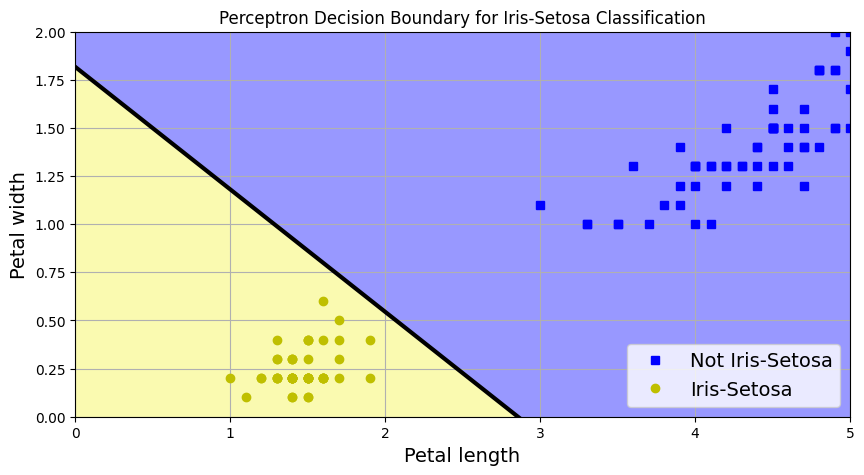

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 5))
plt.plot(X[y == 0, 0], X[y == 0, 1], 'bs', label='Not Iris-Setosa')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'yo', label='Iris-Setosa')
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], 'k-', linewidth=3)
plt.contourf(x0, x1, zz, cmap=ListedColormap(['#9898ff', '#fafab0']))
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.axis(axes)
plt.title('Perceptron Decision Boundary for Iris-Setosa Classification')
plt.grid(True)
plt.show()

Using the `Perceptron` class from Scikit-Learn is equivalent to using the `SGDClassifier` class with the following hyperparameters: `loss='perceptron'`, `learning_rate='constant'`, `etaO=l` (learning rate) and `penalty=None` (no regularization).

<h3>Multilayer Perceptron and Feedback</h3>

A Multilayer Perseptron consists of one (through) input layer, one or more layers of LTU elements called hidden layers and another layer of LTU elements called output layer. Each layer except the output layer includes a bias neuron and is fully connected to the next layer. When an ANN has two or more hidden layers, it is called a **Deep Neural Network (DNN)**.

Activation functions are mathematical functions applied to the output of a neuron in a neural network. They introduce non-linearity into the network, allowing it to learn complex patterns and relationships in the data. Here are short descriptions of some common activation functions:

1. **Sigmoid**: Maps input values to a range between 0 and 1, suitable for binary classification problems.
2. **ReLU (Rectified Linear Unit)**: Outputs the input if it's positive, otherwise outputs zero; widely used due to its simplicity and effectiveness.
3. **Tanh (Hyperbolic Tangent)**: Similar to the sigmoid function but maps input values to a range between -1 and 1, making it symmetric around zero.
4. **Softmax**: Used in the output layer of a neural network for multi-class classification; normalizes the output into a probability distribution over multiple classes.
5. **Leaky ReLU**: Similar to ReLU, but allows a small gradient when the input is negative, addressing the "dying ReLU" problem.
6. **ELU (Exponential Linear Unit)**: Similar to ReLU, but with a non-zero output for negative inputs, which can help learning dynamics.

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def relu(z):
    return np.maximum(0, z)


def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps)) / (2 * eps)

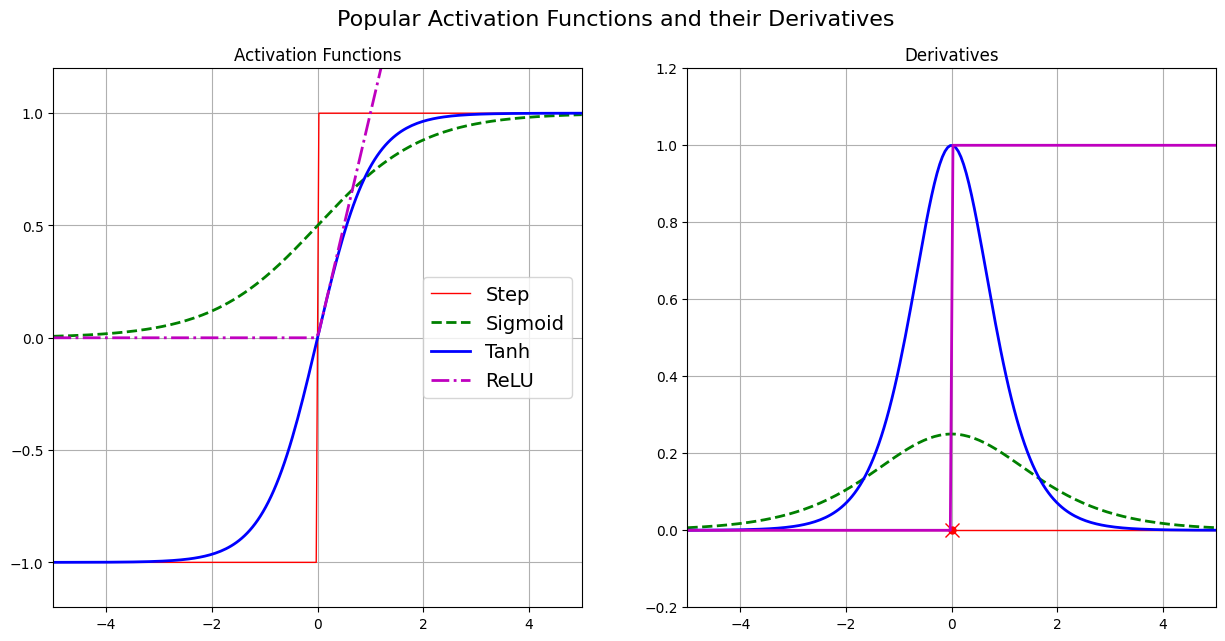

In [4]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(15, 7))

plt.subplot(121)
plt.plot(z, np.sign(z), 'r-', linewidth=1, label='Step')
plt.plot(z, sigmoid(z), 'g--', linewidth=2, label='Sigmoid')
plt.plot(z, np.tanh(z), 'b-', linewidth=2, label='Tanh')
plt.plot(z, relu(z), 'm-.', linewidth=2, label='ReLU')
plt.legend(loc='center right', fontsize=14)
plt.title('Activation Functions')
plt.axis([-5, 5, -1.2, 1.2])
plt.grid(True)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), 'r-', linewidth=1, label='Step')
plt.plot(0, 0, 'ro', markersize=5)
plt.plot(0, 0, 'rx', markersize=10)
plt.plot(z, derivative(sigmoid, z), 'g--', linewidth=2, label='Sigmoid')
plt.plot(z, derivative(np.tanh, z), 'b-', linewidth=2, label='Tanh')
plt.plot(z, derivative(relu, z), 'm-', linewidth=2, label='ReLU')
plt.title('Derivatives')
plt.axis([-5, 5, -0.2, 1.2])
plt.grid(True)

plt.figtext(
    0.5,
    0.95,
    'Popular Activation Functions and their Derivatives',
    ha='center',
    va='center',
    fontsize=16,
)
plt.show()